# k-means clustering


*   Turotial01: A simple version of k-means clustering implementation 
*   Turotial02: KMeans from scikit-learn 




## Tutorial01: k-means clustering implementation

아래는 k = 3 인 2D 데이터셋에서 동작하는 k-means clutering 구현코드이다. 

k-means clustering 설명을 위해 우선 램덤 데이터 셋을 생성한다.

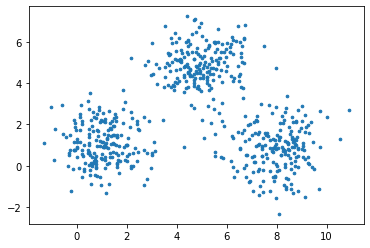

In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# Set three centers for random data generation 
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data around the three centers
data_1 = np.random.randn(200,2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)
plt.show()

k(=3)개의 초기 중심값(centoid)을 랜덤하게 생성한다.

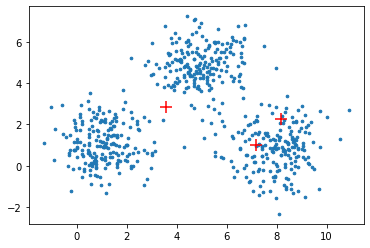

In [ ]:
k = 3             # number of clusters
n = data.shape[0] # number of training data
c = data.shape[1] # number of features in the data

# Generate random centroids, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centroids = np.random.randn(k,c)*std + mean # initial centroids 

# Plot the data and the centroids generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centroids[:,0], centroids[:,1], marker='+', c='r', s=150)
plt.show()

중심값 업데이트를 위한 변수(centoids_old, centroids_new) 선언


In [ ]:
centroids_old = np.zeros(centroids.shape) # to store old centroids
centroids_new = deepcopy(centroids) # to store new centroids, initialized with the randomly generated centroids 

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))
error = np.linalg.norm(centroids_new - centroids_old)
iteration_counter = 0

새로운 계산된 중심값이 이전 중심값과 동일 할때 까지 

(i.e., error = 0 where the error is defined as a distance between centroids_new and centroids_old)

새로운 중심값 계산 및 클러스터링 반복.


In [ ]:
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centroids_new[i], axis=1)

    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centroids_old = deepcopy(centroids_new)

    # Calculate mean for every cluster and update the centroid
    for i in range(k):
        centroids_new[i] = np.mean(data[clusters == i], axis=0)

    error = np.linalg.norm(centroids_new - centroids_old)
    iteration_counter = iteration_counter + 1

클러스터링 결과 시각화

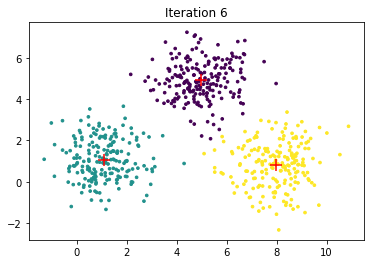

In [ ]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7, c=clusters)
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='+', c='r', s=150)
plt.title('Iteration '+str(iteration_counter))
plt.show()

## Tutorial02: scikit-learn의 KMean 사용

### KMean을 이용한 클러스터링


[Scikit-learn](https://scikit-learn.org/)에서 제공되는 [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)를 이용해 Tutorial01에서 확인한 클러스터링을 쉽게 수행할 수 있다.

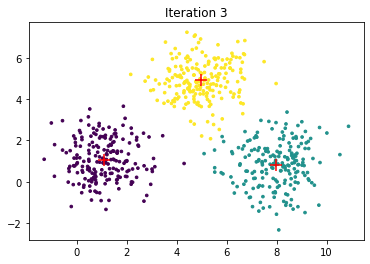

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(data)
labels = model.labels_
cluster_centers = model.cluster_centers_
iter = model.n_iter_

plt.scatter(data[:,0], data[:,1], s=7, c=labels)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='+', c='r', s=150)
plt.title('Iteration '+str(iter))
plt.show()

### Finding k with Elbow method

KMeans의 inertia_ 속성은 SSE 값을 저장한다 ([Scikit-learn KMeans](https://scikit-learn.org/stable/modules/clustering.html#k-means)).

inertia_를 이용해 elbow method를 적용해 보자.
초기 centroids의 배치가 동일하도록, 즉 반복실행시에도 클러스터링의 결과값이 동일하도록 random_state를 사용하였다.

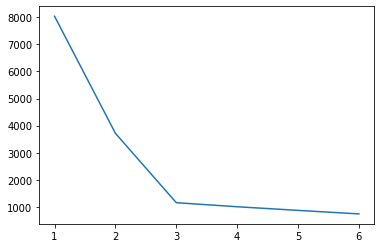

In [ ]:
inertia = []
for k in range(1,7):
  model = KMeans(n_clusters = k, random_state=42)
  model.fit(data)
  inertia.append(model.inertia_)
plt.plot(range(1,7), inertia)
plt.show()

k = 3 일 때, 그래프가 꺾이는 것을 볼 수 있다.

### Silhouette Score

Scikit-learn은 모델 성능평가를 위한 도구를 제공한다. [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)를 통해 실루엣 점수를 아래와 같이 계산할 수 있다.


In [ ]:
from sklearn import metrics

model = KMeans(n_clusters = 3, random_state=42)
model.fit(data)
labels = model.labels_
metrics.silhouette_score(data,labels)

0.6570655029406599

Elbow 메소드에서 SSE를 통해 적절한 클러스터수를 정할 수 있었듯이, Silhouette Score(SS)도 k값을 정하는데 사용할 수 있다.

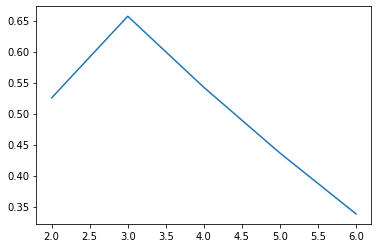

In [ ]:
SC = []
for k in range(2,7):
  model = KMeans(n_clusters = k, random_state=42)
  model.fit(data)
  labels = model.labels_
  score = metrics.silhouette_score(data,labels)
  SC.append(score)
plt.plot(range(2,7), SC)
plt.show()